# DESAFIO PETLOVE

Seu desafio é participar da equipe de Assinatura, serviço onde o dono do animal
programa a entrega de um conjunto de itens dentro de um período customizado,
recebendo descontos e brindes exclusivos para assinantes.

## CARREGAR PACOTES E IMPORTAR DADOS

In [ ]:
# Carregar pacotes
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [ ]:
# Importando os dados 
dados= pd.read_csv("/data-test-analytics.csv")

In [ ]:
# Informações gerais dos dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  10000 non-null  object 
 1   created_at          10000 non-null  object 
 2   updated_at          10000 non-null  object 
 3   deleted_at          505 non-null    object 
 4   name_hash           10000 non-null  object 
 5   email_hash          10000 non-null  object 
 6   address_hash        10000 non-null  object 
 7   birth_date          10000 non-null  object 
 8   status              10000 non-null  object 
 9   version             10000 non-null  object 
 10  city                10000 non-null  object 
 11  state               10000 non-null  object 
 12  neighborhood        10000 non-null  object 
 13  last_date_purchase  10000 non-null  object 
 14  average_ticket      10000 non-null  float64
 15  items_quantity      10000 non-null  int64  
 16  all_r

In [ ]:
# Visualizar as cinco primeiras linhas
dados.head()

,id,created_at,updated_at,deleted_at,name_hash,email_hash,address_hash,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
0,8bf7960e-3b93-468b-856e-6c6c5b56f52b,08/15/17 07:05 AM,01/14/21 11:23 AM,NaN,312d206168a318614897e8ccac43bff9,83eb3aed9a44377df80ce876dce92c9a,8b4bfaa0cbc41a16f46da15ddcd6a907,07/10/74 12:00 AM,active,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,01/14/21 11:23 AM,151.142942,10,906.857651,6,35,crm
1,a39535b5-4647-4680-b4f6-3aed57c1f1ff,12/31/19 09:53 PM,01/08/21 11:23 AM,NaN,de448fcb47d0d6a873b2eef52b5ee595,72678bb35e2ac84ed373e81dd9dca28c,22f1cfa1847f38da3f3cb114dd2b9247,07/06/40 12:00 AM,paused,3.30.12,Fernandes,RR,Santa Isabel,01/08/21 11:23 AM,236.991790,4,236.991790,1,41,organic_search
2,dc067cd2-c021-42bd-8c0e-beb267280e66,03/07/19 11:46 PM,01/07/21 11:23 AM,NaN,cb09e447ddc38283373d56bb46498e6a,668f4ee9add29c7bd02c485f1b7509e3,6cb47446a086ee6483b3eb954f11467a,03/18/63 12:00 AM,active,3.28.9,Lopes,RR,Estrela,01/07/21 11:23 AM,211.955597,13,2331.511572,11,42,organic_search
3,b5e4caeb-3a9b-49ed-aa33-5acd06b162c1,07/21/18 10:17 AM,01/10/21 11:23 AM,NaN,52593437a405b11b3557170680ef80c8,d3fb45188d95c8d7cc49da5b4f727c86,0a6f0c54db1e6f19347f96b50f8092a4,11/21/80 12:00 AM,active,3.34.3,Campos do Campo,PE,Confisco,01/10/21 11:23 AM,204.113227,8,1224.679359,6,39,organic_search
4,d4ff61fc-f008-4e19-b8ae-bd70cfa3ae27,06/08/18 12:09 PM,01/18/21 11:23 AM,NaN,dbda4b778a966c21904238ed2d2005db,a0f76bc49b4c43327b536da6e1a1465e,143b9f169b4fa1692f6d79b5682169b5,07/07/59 12:00 AM,active,3.19.8,das Neves,RJ,Vila Suzana Segunda Seção,01/18/21 11:23 AM,252.940997,9,2023.527980,8,31,crm


In [ ]:
# Visualizar as cinco últimas linhas
dados.tail()

,id,created_at,updated_at,deleted_at,name_hash,email_hash,address_hash,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
9995,90c9fd5f-80d2-4f59-9970-6b3e6dac5f57,09/12/17 12:35 AM,01/31/21 11:23 AM,NaN,eb89d44181a7873ba67f24ff511fc57f,befbd1b02e0a4d52a913adbd093789ab,be93ff9948bf23bd373599f3d5d3798c,09/12/61 12:00 AM,active,4.30.12,Souza,RN,Concórdia,01/31/21 11:23 AM,215.079785,5,1075.398927,5,18,paid_search
9996,0edb7aec-8816-4904-bcd7-cbe141391441,04/20/18 07:43 AM,01/18/21 11:23 AM,NaN,8d5dc7dd1225fa9746f4509c8cadeedb,d1beba53e18c097d0bb2a4a91de9ad09,1aafbc7d76201a320a5f97dafd891e95,09/15/69 12:00 AM,active,4.28.13,Silveira,AL,São Francisco,01/18/21 11:23 AM,254.525826,10,2290.732434,9,31,organic_search
9997,30130652-d616-4b40-adbb-189e3351016c,08/14/17 12:28 AM,01/03/21 11:23 AM,NaN,9517c44d34d9965d25e77487a510b696,baffbfb45790c0bca921d418b2ccc987,0cad001abedb688cc64a819d04a3bc71,01/14/60 12:00 AM,active,3.18.11,Martins,SC,Frei Leopoldo,01/03/21 11:23 AM,208.741902,8,1252.451411,6,46,paid_search
9998,37b52952-afdd-425a-9149-4012ea48ac87,01/19/17 07:19 PM,01/09/21 11:23 AM,NaN,c800df6e2b9449cb5d6a812563566887,0373a1cdff0fca0b4c4111401051548c,ffd915817fc2bd67575436b7f8e57bde,08/06/57 12:00 AM,active,5.51.6,Gomes das Flores,PA,Cdi Jatoba,01/09/21 11:23 AM,211.174796,9,0.000000,0,40,direct
9999,97518d4a-88a1-49ff-a5cc-ad1e8967afdc,02/18/17 03:15 AM,01/16/21 11:23 AM,NaN,3d0a1b90c39270c39250680c4b26d082,92053227878d63b2fa05978c0a9bf9ae,89350fd7d01ec1a639fed0f193208cd9,09/14/43 12:00 AM,active,4.36.11,Alves,MT,Vila Mangueiras,01/16/21 11:23 AM,259.786807,7,2857.654879,11,33,direct


## ANÁLISE EXPLORATÓRIA DOS DADOS


In [ ]:
# Churn
round(len(dados[dados["status"]=="canceled"]) / len(dados[dados["status"]=="active"]) *100,2)

5.92

### 1.STATUS DA ASSINATURA


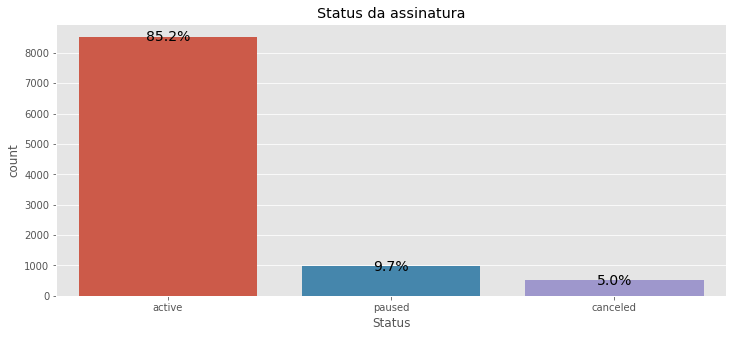

In [ ]:
# Gráfico de status da assinatura
plt.figure(figsize=(12,5))
total = float(len(dados["status"]))
cp=sns.countplot(dados["status"])
for p in cp.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2
    y = p.get_height()
    cp.annotate(percentage, (x, y),size=14,ha="center",va="center")
plt.title("Status da assinatura")
plt.xlabel("Status")
plt.savefig('plot1.png', format='png')
plt.show()


#### Tíquete Médio

In [ ]:
# Estatística descritiva tiquete médio por status de assinatura
dados[["average_ticket","status"]].groupby("status").describe()

average_ticket              ...                        
                  count        mean  ...         75%         max
status                               ...                        
active           8524.0  216.732335  ...  232.444647  303.386848
canceled          505.0  217.438501  ...  232.135380  278.300436
paused            971.0  218.037307  ...  232.779745  291.962908

[3 rows x 8 columns]

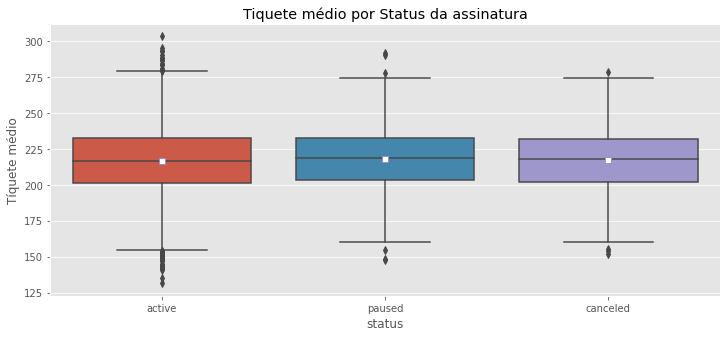

In [ ]:
# Gráfico do tíquete médio por status da assinatura
plt.figure(figsize=(12,5))
plt.style.use('ggplot')
sns.boxplot(data=dados, x="status", y="average_ticket",showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white"})
plt.title("Tiquete médio por Status da assinatura")
plt.ylabel("Tíquete médio")
plt.savefig("plot2.png")
plt.show()

#### Média de Items na Assinatura

In [ ]:
# Estatística descritiva média de items por status de assinatura
dados[["items_quantity","status"]].groupby("status").describe()

items_quantity                                               
                  count      mean       std  min  25%  50%   75%   max
status                                                                
active           8524.0  8.477710  3.025504  1.0  6.0  8.0  11.0  19.0
canceled          505.0  8.647525  2.951748  1.0  7.0  9.0  11.0  18.0
paused            971.0  8.616890  3.066864  1.0  6.0  9.0  11.0  18.0

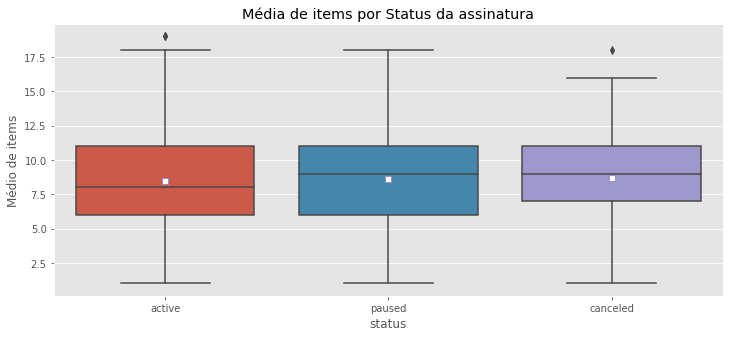

In [ ]:
# Gráfico da média de items por status da assinatura
plt.figure(figsize=(12,5))
plt.style.use('ggplot')
sns.boxplot(data=dados, x="status", y="items_quantity",showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white"})
plt.title("Média de items por Status da assinatura")
plt.ylabel("Médio de items")
plt.savefig("plot3.png")
plt.show()

#### Total de Receita Realizado pelo Cliente

In [ ]:
# Estatística descritiva total de receita por status de assinatura
dados[["all_revenue","status"]].groupby("status").describe()

all_revenue               ...                          
               count         mean  ...          75%          max
status                             ...                          
active        8524.0  1180.212943  ...  1801.683082  3225.654163
canceled       505.0  1059.405752  ...  1669.802614  2873.700656
paused         971.0  1188.209065  ...  1813.098558  2798.724278

[3 rows x 8 columns]

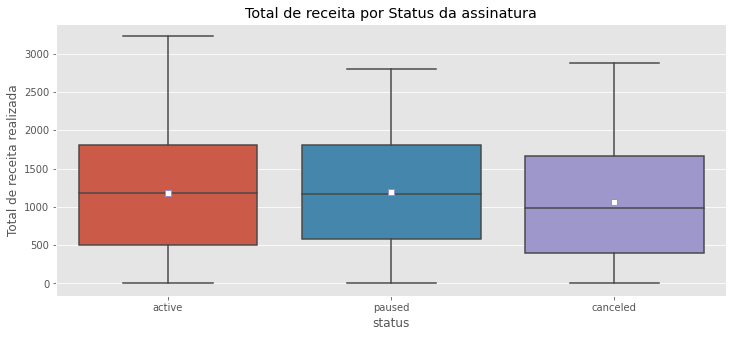

In [ ]:
# Gráfico do total de receita por status da assinatura
plt.figure(figsize=(12,5))
plt.style.use('ggplot')
sns.boxplot(data=dados, x="status", y="all_revenue",showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white"})
plt.title("Total de receita por Status da assinatura")
plt.ylabel("Total de receita realizada")
plt.savefig("plot4.png")
plt.show()

#### Total de Pedidos Realizado pelo Cliente

In [ ]:
# Estatística descritiva total de pedidos por status de assinatura
dados[["all_orders","status"]].groupby("status").describe()

all_orders                                              
              count      mean       std  min  25%  50%  75%   max
status                                                           
active       8524.0  5.444510  3.453667  0.0  2.0  6.0  8.0  11.0
canceled      505.0  4.857426  3.483446  0.0  2.0  5.0  8.0  11.0
paused        971.0  5.450051  3.457299  0.0  3.0  5.0  8.0  11.0

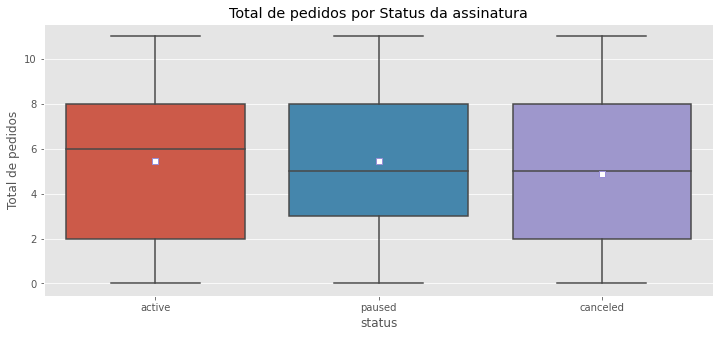

In [ ]:
# Gráfico do total de pedidos por status da assinatura
plt.figure(figsize=(12,5))
plt.style.use('ggplot')
sns.boxplot(data=dados, x="status", y="all_orders",showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white"})
plt.title("Total de pedidos por Status da assinatura")
plt.ylabel("Total de pedidos")
plt.savefig("plot5.png")
plt.show()

#### Tempo Desde a Última Compra do Cliente

In [ ]:
# Estatística descritiva do tempo desde última compra por status de assinatura
dados[["recency","status"]].groupby("status").describe()

recency                                                            
           count        mean         std   min    25%    50%     75%     max
status                                                                      
active    8524.0   34.532145    6.070320  11.0   30.0   35.0    39.0    56.0
canceled   505.0  680.970297  463.006656   1.0  278.0  600.0  1031.0  1820.0
paused     971.0   34.693100    5.862914  18.0   31.0   34.0    39.0    55.0

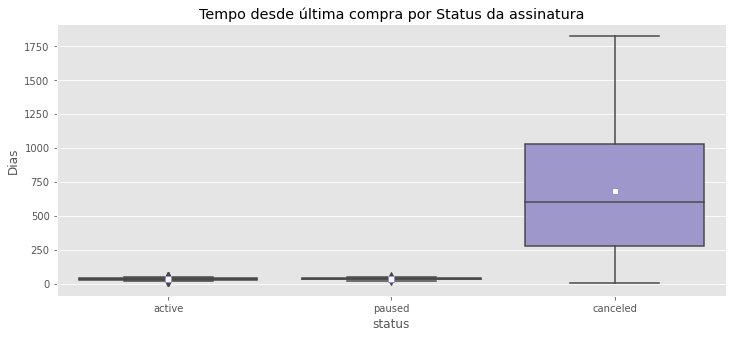

In [ ]:
# Gráfico do tempo desde última compra por status da assinatura
plt.figure(figsize=(12,5))
plt.style.use('ggplot')
sns.boxplot(data=dados, x="status", y="recency",showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white"})
plt.title("Tempo desde última compra por Status da assinatura")
plt.ylabel("Dias")
plt.savefig("plot6.png")
plt.show()

### Idade do cliente

In [ ]:
# Selecionando data nascimento assinaturas canceladas
age_canceled= pd.to_datetime(dados[dados["status"]=="canceled"].birth_date)

In [ ]:
# Transformando data de nascimento em idade
age_canceled=age_canceled.dt.year.astype(str)
head=pd.Series(age_canceled).str[:2].replace("20","19")
tail=pd.Series(age_canceled).str[2:]
age_canceled= head + tail
age_canceled= 2021 - age_canceled.astype(int)

In [ ]:
# Estatística descritiva da idade
age_canceled.describe()

count    505.000000
mean      53.522772
std       16.307316
min       25.000000
25%       39.000000
50%       54.000000
75%       68.000000
max       81.000000
Name: birth_date, dtype: float64

In [ ]:
# Selecionando data nascimento assinaturas canceladas
age_active= pd.to_datetime(dados[dados["status"]=="active"].birth_date)
age_active=age_active.dt.year.astype(str)
head2=pd.Series(age_active).str[:2].replace("20","19")
tail2=pd.Series(age_active).str[2:]
age_active= head2 + tail2
age_active= 2021 - age_active.astype(int)
age_active.describe()

count    8524.000000
mean       53.204247
std        16.068277
min        25.000000
25%        39.000000
50%        53.000000
75%        67.000000
max        81.000000
Name: birth_date, dtype: float64

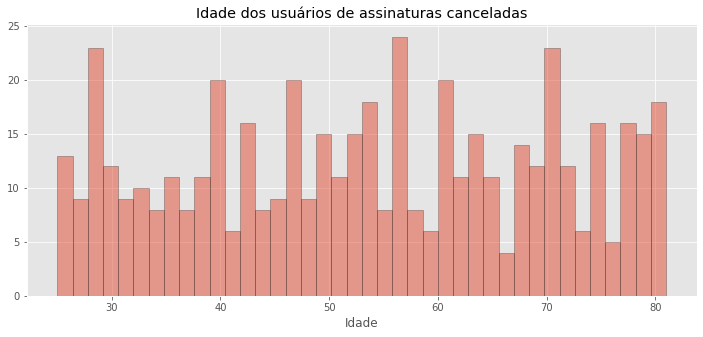

In [ ]:
# Gráfico idade dos usuários de assinaturas canceladas
age_canceled.hist(figsize=(12,5),bins=40,histtype='bar',alpha=0.5,ec='black')
plt.xlabel("Idade")
plt.title("Idade dos usuários de assinaturas canceladas")
plt.savefig("plot14.png")
plt.show()

### 2. TEMPO DE ASSINATURA

In [ ]:
# Período entre criação e cancelamento da assinatura
time= pd.to_datetime(dados["deleted_at"]) - pd.to_datetime(dados["created_at"])

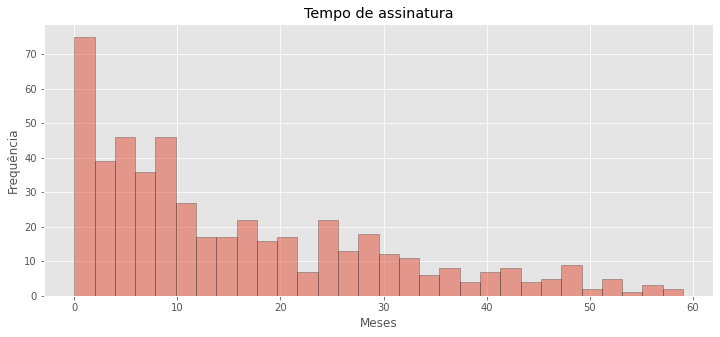

In [ ]:
# Gráfico com tempo de assinatura
timeMonth=time.dt.days /30
plt.style.use('ggplot')
timeMonth.hist(figsize=(12,5),bins=30,histtype='bar',alpha=0.5,ec='black')
plt.title("Tempo de assinatura")
plt.ylabel("Frequência")
plt.xlabel("Meses")
plt.savefig("plot7.png")
plt.show()

### 3. VERSÃO DA ASSINATURA

In [ ]:
# Convertendo e editando a coluna versão de assinatura
dados["version_ed"]= dados.version.astype(str).str[0].astype(int)

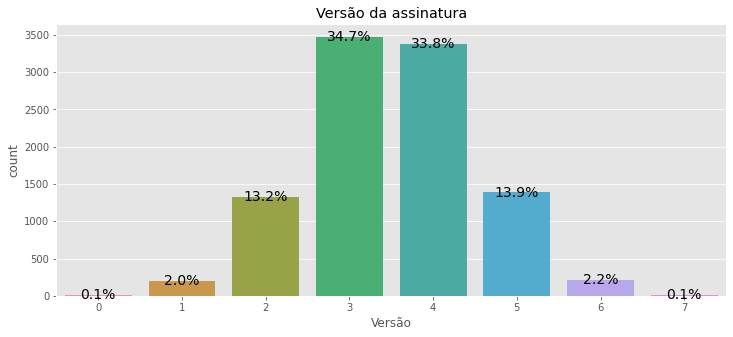

In [ ]:
# Gráfico versão da assinatura
plt.figure(figsize=(12,5))
total = float(len(dados["version_ed"]))
cp=sns.countplot(dados["version_ed"])
for p in cp.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2
    y = p.get_height()
    cp.annotate(percentage, (x, y),size=14,ha="center",va="center")
plt.title("Versão da assinatura")
plt.xlabel("Versão")
plt.savefig("plot8.png")
plt.show()

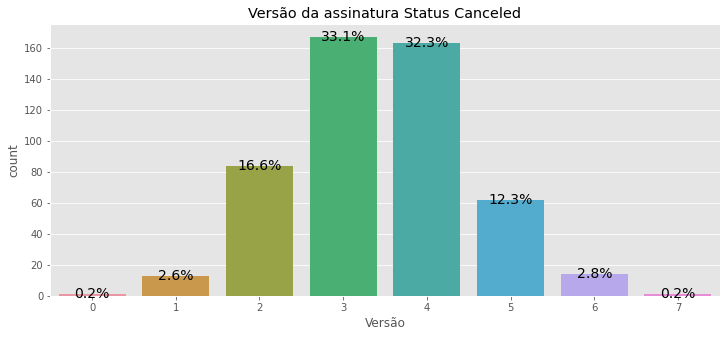

In [ ]:
# Gráfico versão por status cancelado da assinatura
canceled_plot=dados[dados["status"]== "canceled"].version_ed
plt.figure(figsize=(12,5))
total = float(len(canceled_plot))
cp=sns.countplot(canceled_plot)
for p in cp.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2
    y = p.get_height()
    cp.annotate(percentage, (x, y),size=14,ha="center",va="center")
plt.title("Versão da assinatura Status Canceled")
plt.xlabel("Versão")
plt.savefig("plot9.png")
plt.show()

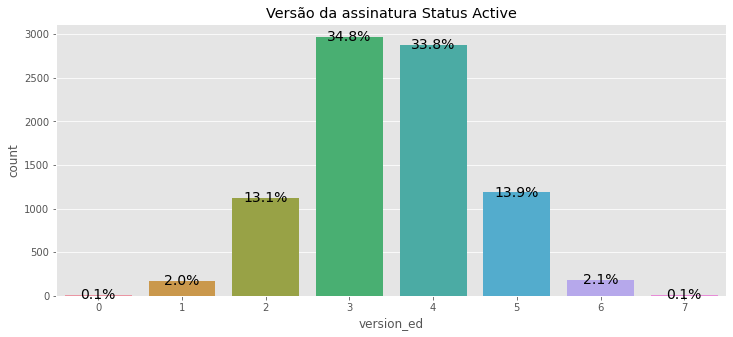

In [ ]:
# Gráfico versão por status cancelado da assinatura
active_plot=dados[dados["status"]== "active"].version_ed
plt.figure(figsize=(12,5))
total = float(len(active_plot))
cp=sns.countplot(active_plot)
for p in cp.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2
    y = p.get_height()
    cp.annotate(percentage, (x, y),size=14,ha="center",va="center")
plt.title("Versão da assinatura Status Active")
plt.show()

## ESTADO E STATUS DA ASSINATURA

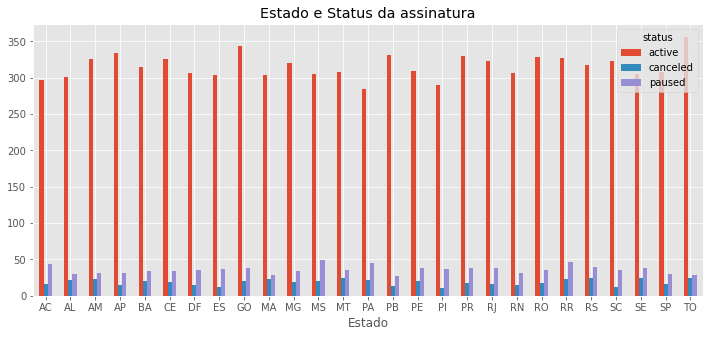

In [ ]:
# Gráfico Estado e status da assinatura
dados_final=dados.groupby(["state","status"]).size().unstack(1)
state = dados_final.plot(kind='bar',figsize=(12,5), rot=0)
plt.title("Estado e Status da assinatura")
plt.xlabel("Estado")
plt.savefig("plot10.png")
plt.show()

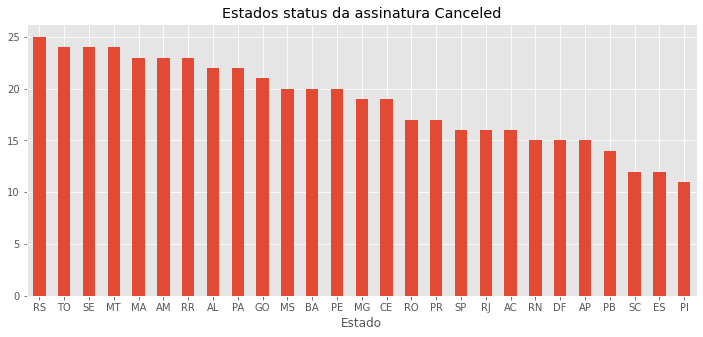

In [ ]:
# Gráfico Estado dos assinaturas canceladas
dados_final.canceled.sort_values(ascending=False).plot(kind="bar",figsize=(12,5),rot=0)
plt.title("Estados status da assinatura Canceled")
plt.xlabel("Estado")
plt.savefig("plot11.png")
plt.show()

## CANAL ASSINATURA

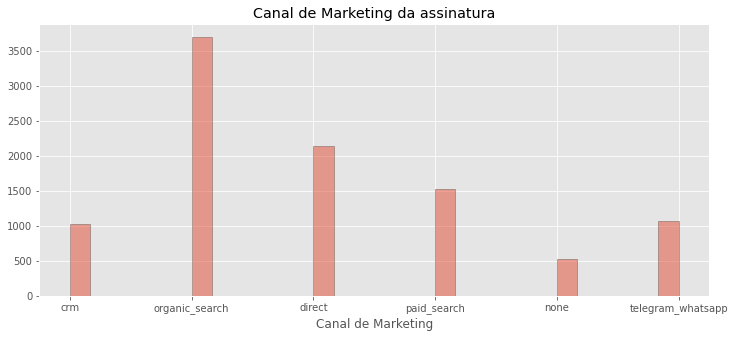

In [ ]:
# Gráfico canal de marketing da assinatura
plt.style.use('ggplot')
dados["marketing_source"].hist(figsize=(12,5),bins=30,histtype='bar',alpha=0.5,ec='black')
plt.title("Canal de Marketing da assinatura")
plt.xlabel("Canal de Marketing")
plt.savefig("plot12.png")
plt.show()

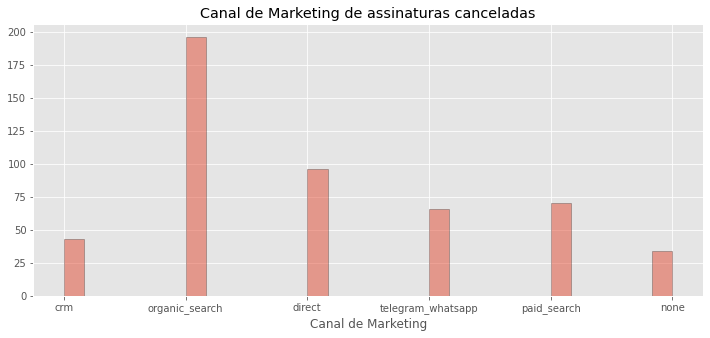

In [ ]:
# Gráfico canal de marketing de assinaturas canceladas
plt.style.use('ggplot')
dados[dados["status"]=="canceled"].marketing_source.hist(figsize=(12,5),bins=30,histtype='bar',alpha=0.5,ec='black')
plt.title("Canal de Marketing de assinaturas canceladas")
plt.xlabel("Canal de Marketing")
plt.savefig("plot13.png")
plt.show()